In [2]:
#Importing data
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Math
import math 

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

#Machine Learning Imports
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

#from evaluation our ML results
from sklearn import metrics 

#Dataset import 

import statsmodels.api as sm

Visualization of Data 

In [3]:
df = sm.datasets.fair.load_pandas().data

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
def affair_check(x):
    if x!=0:
        return 1
    else :
        return 0

In [6]:
df['Had_Affair']=df['affairs'].apply(affair_check)

In [7]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [8]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


From this data we can see that women who had affairs were slightly older with less of a marriage rate ,less religous,had more children, more married years , less level of education encomparison to their husbands. 

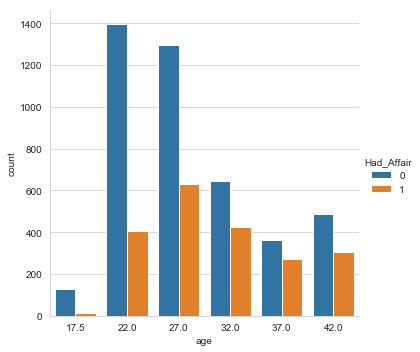

In [9]:


sns.catplot(x="age",
                kind="count",
            hue="Had_Affair",
                data=df)


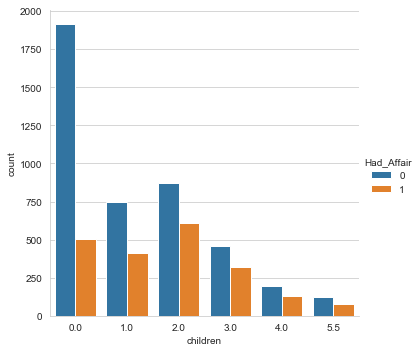

In [10]:
sns.catplot(x="children",
                kind="count",
            hue="Had_Affair",
                data=df)


Women who had less children had less affairs 

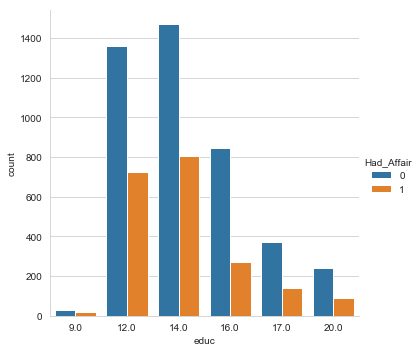

In [11]:
sns.catplot(x="educ",
                kind="count",
            hue="Had_Affair",
                data=df)

In [12]:
occ_dummies = pd.get_dummies(df['occupation'])

In [15]:
 hus_occ_dummies=pd.get_dummies(df['occupation_husb'])

In [16]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [17]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [18]:
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [19]:
X= df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [20]:
dummies=pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [21]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [22]:
dummies

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,1,0,0
6,0,0,0,0,1,0,0,0,0,1,0,0
7,0,1,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,1,0,0,0
9,0,0,1,0,0,0,0,0,0,0,1,0


In [23]:
X=pd.concat([X,dummies],axis=1)

In [24]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [25]:
Y=df.Had_Affair

In [26]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [28]:
X=X.drop('occ1',axis=1)

In [29]:
X=X.drop('hocc1',axis=1)

In [32]:
X=X.drop('affairs',axis=1)

In [33]:
#Change Y to 1D array 

Y=np.ravel(Y)



In [34]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [37]:
#Creating Model 
log_model=LogisticRegression()

In [38]:
log_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
#Check accuracy of Model

log_model.score(X,Y)



0.72588752748978946

In [41]:
#Chech Y mean(percentage of women who had affairs)

Y.mean()

0.32249450204209867

In [42]:
#Checking the likelihood preditator of affairs

coeff_df=DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [43]:
coeff_df

#Increase rate in relgion,age and rate of marriage lead to a decressess in having a affair

,0,1
0,rate_marriage,[-0.697931970671]
1,age,[-0.0563682400183]
2,yrs_married,[0.103921723342]
3,children,[0.0181603447361]
4,religious,[-0.368522143716]
5,educ,[0.00874698727495]
6,occ2,[0.298050558996]
7,occ3,[0.607991741692]
8,occ4,[0.346240857958]
9,occ5,[0.942521745077]


In [44]:
#Creating data to train with 

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [48]:
#Creating a new model
log_model2=LogisticRegression()
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
class_predict=log_model2.predict(X_test)

In [51]:

#shows the percentage of accuracy prediction
print metrics.accuracy_score(Y_test,class_predict)

0.734296482412
